# Decision Trees and Random Forests in Python

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

## EDA

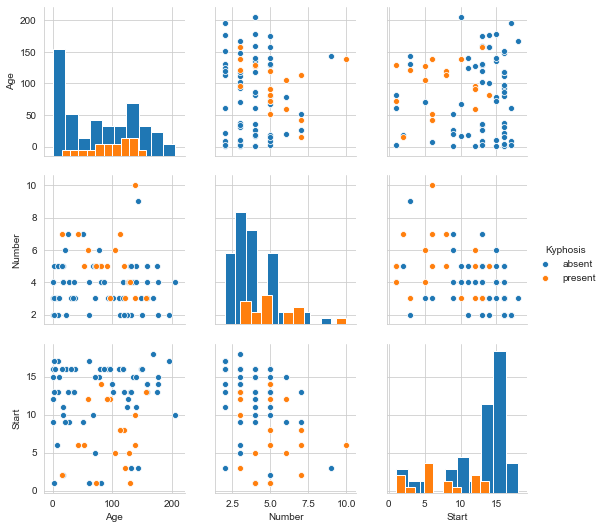

In [6]:
sns.pairplot(df, hue= 'Kyphosis', diag_kind="hist")

## Train Test Split

In [7]:
X= df.drop('Kyphosis', axis = 1)
y= df['Kyphosis']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
#train
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
#predictions
pred = dtree.predict(X_test)

In [14]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

      absent       0.82      0.95      0.88        19
     present       0.67      0.33      0.44         6

    accuracy                           0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25

[[18  1]
 [ 4  2]]


## Tree Visualization

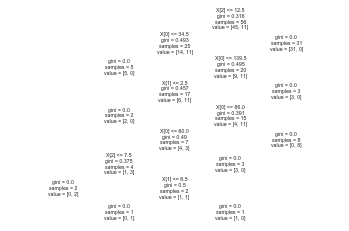

In [30]:
from sklearn import tree
tree.plot_tree(dtree.fit(X_train, y_train) )
plt.show()

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=100)

In [43]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rfc_pred = rfc.predict(X_test)

In [45]:
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      0.95      0.88        19
     present       0.67      0.33      0.44         6

    accuracy                           0.80        25
   macro avg       0.74      0.64      0.66        25
weighted avg       0.78      0.80      0.77        25

[[18  1]
 [ 4  2]]
